In [1]:
!nvidia-smi

Sun Apr 16 13:38:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**install** **yolov8**

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

**Training model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [ ]:
!ls

data  data.yaml  dogs.jfif  runs  yolov8_custom  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=30 imgsz=448 plots=True

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=448, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, work

In [ ]:
!ls runs/detect/train/

args.yaml  weights


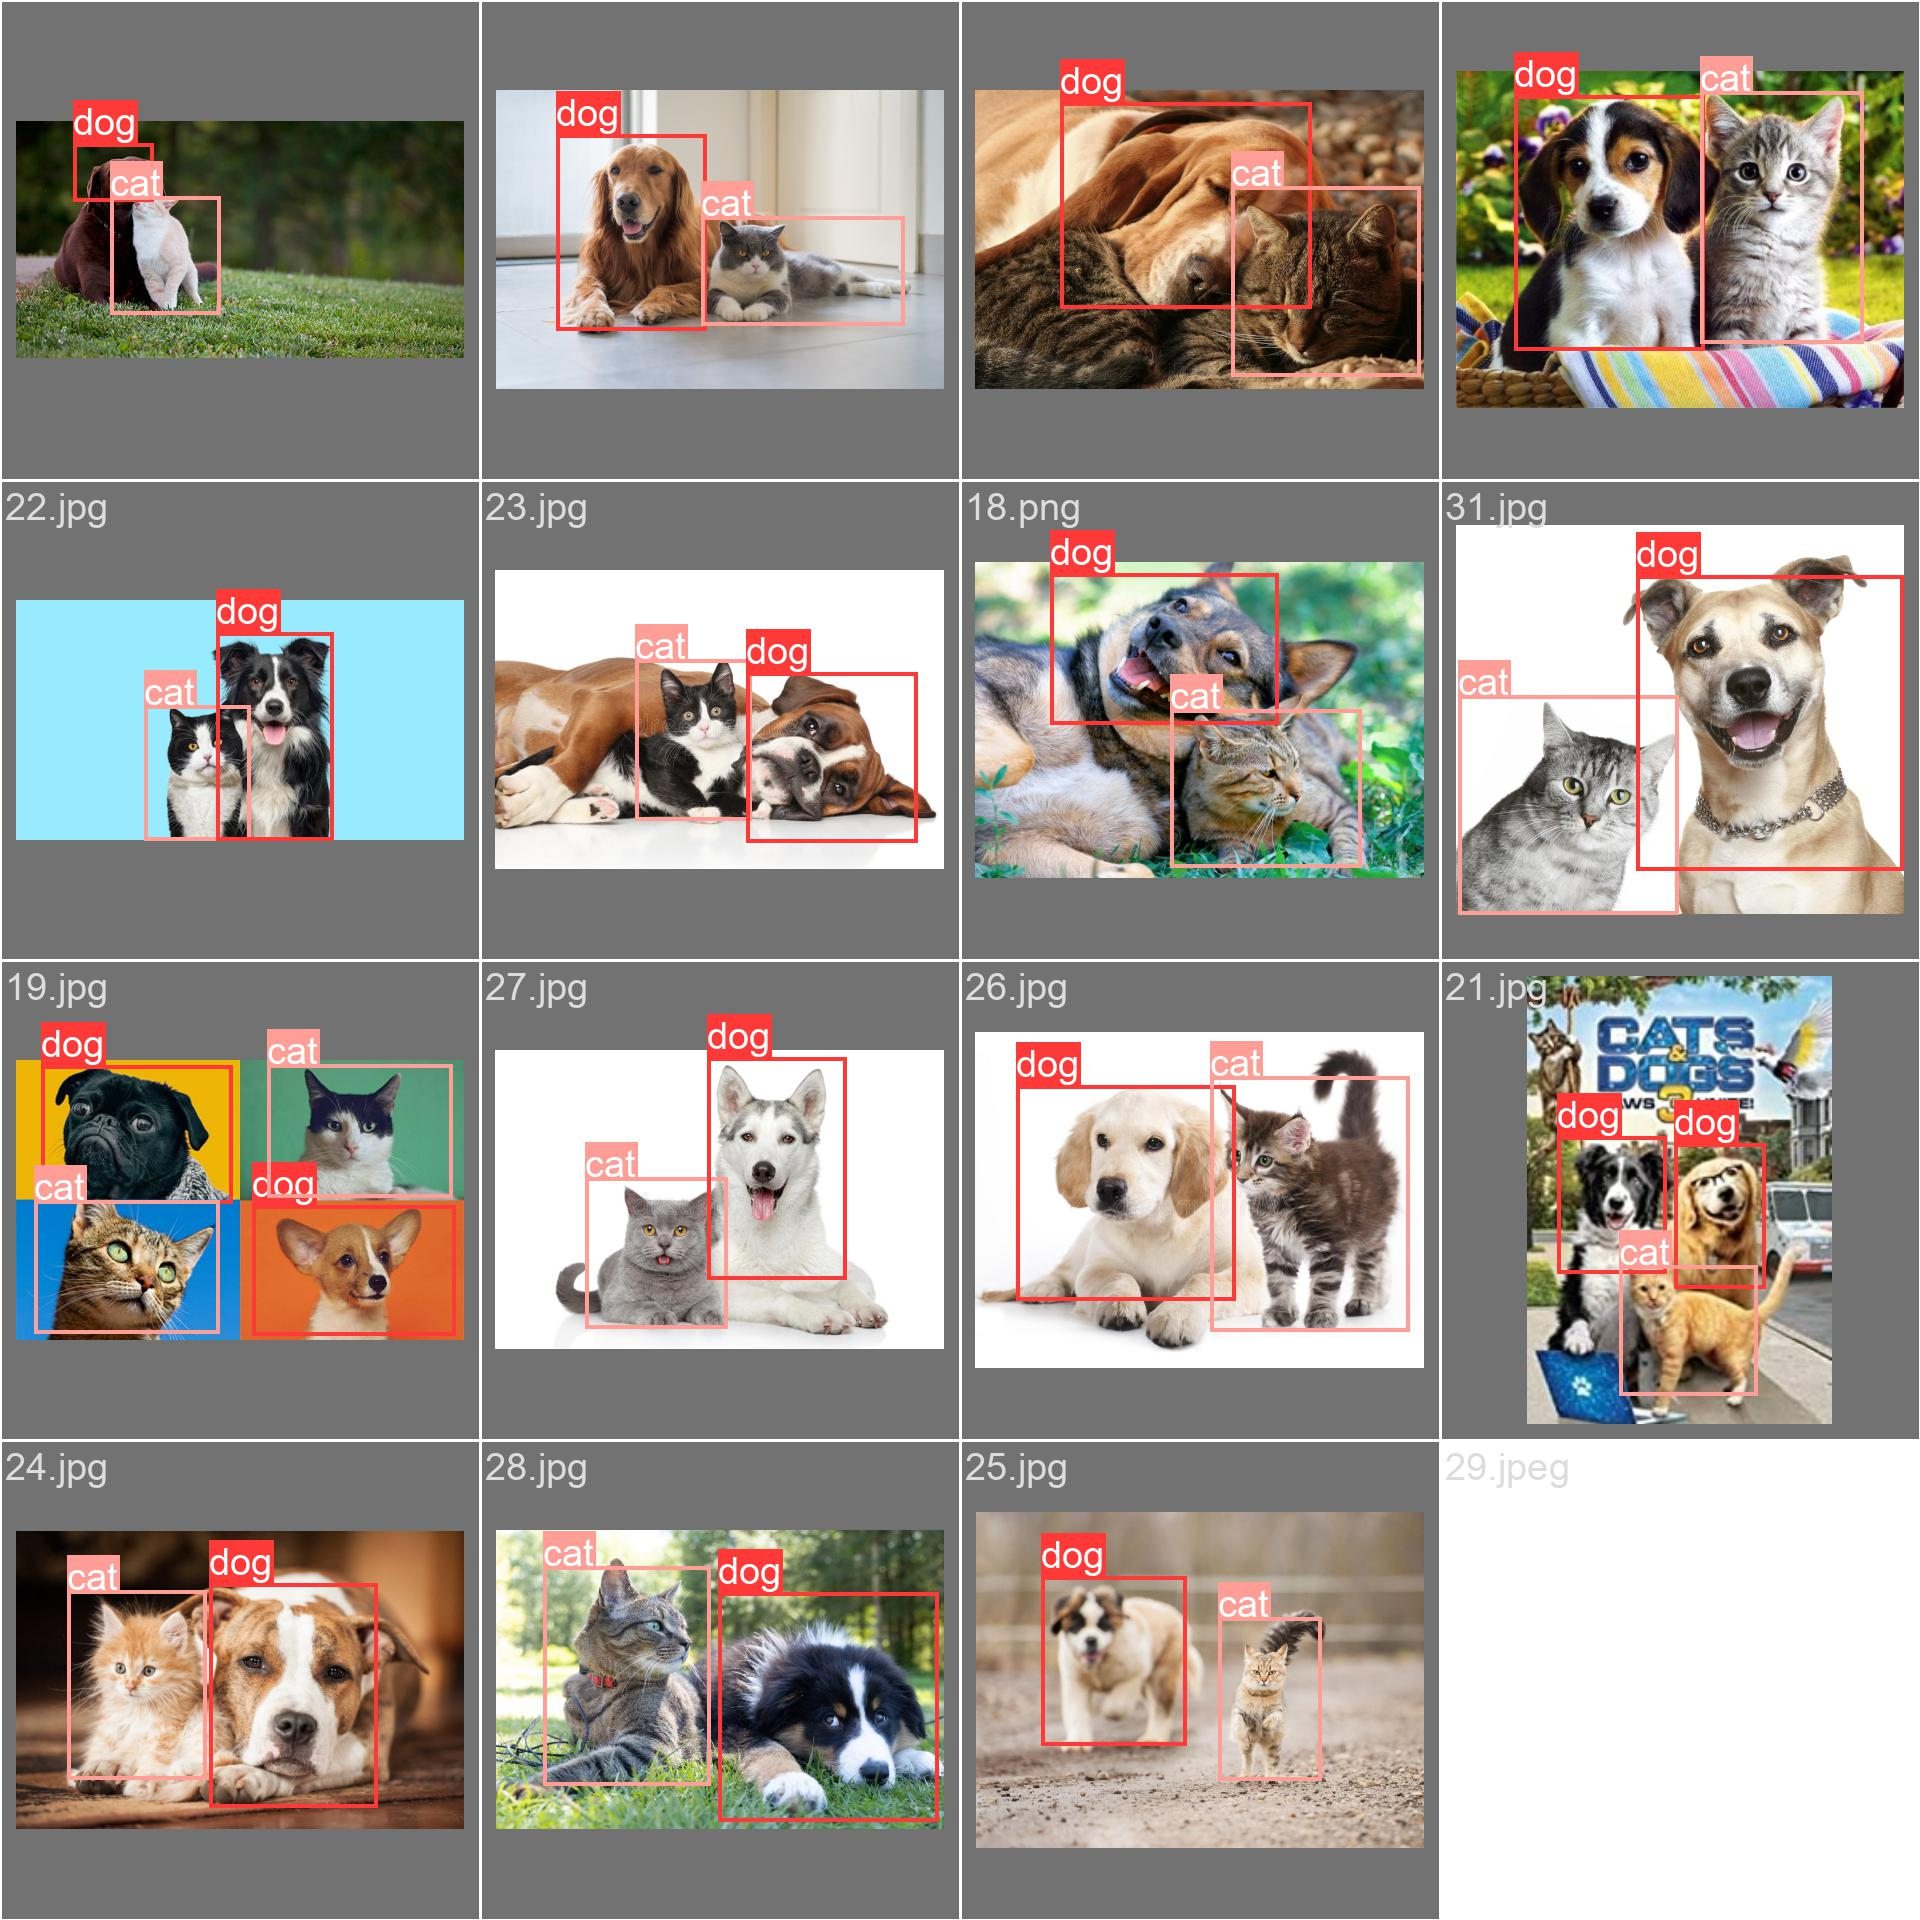

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8/runs/detect/train10/val_batch0_labels.jpg', width=800)

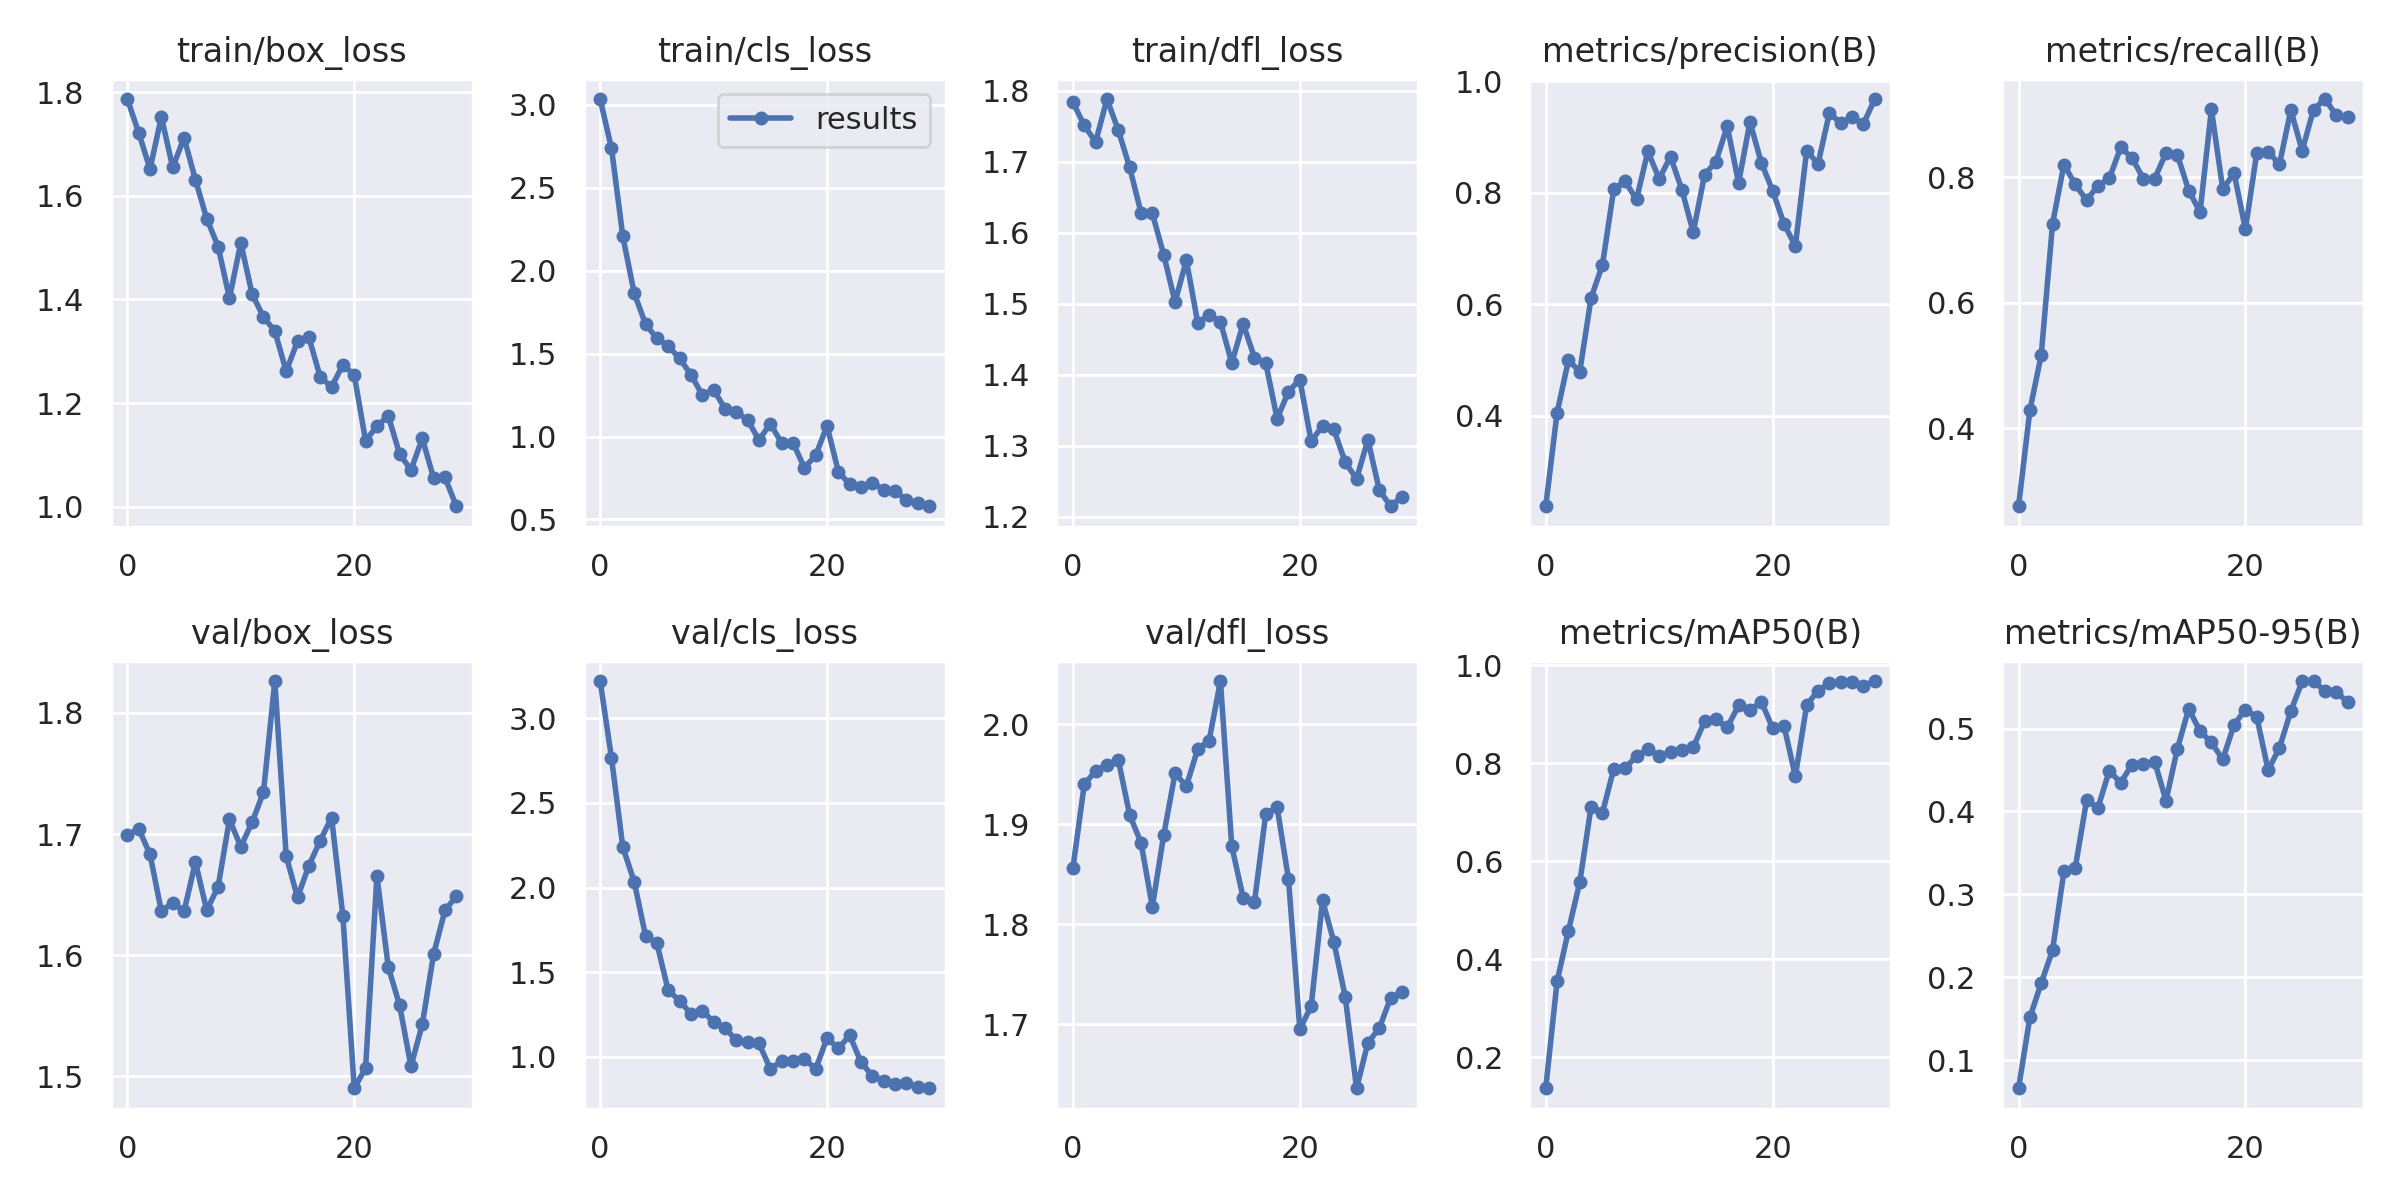

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8/runs/detect/train10/results.png', width=900)

**Validate Custom Model**

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/yolov8/runs/detect/train10/weights/best.pt data=data.yaml

2023-04-16 03:41:21.247762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 03:41:23.225161: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8/data/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:07<00:00,  7.03s/it]
                   all         15         33      0.925      0.908      0.966      0.557
                   dog         15         17      0.968      0.882      

**Inference with Custom Model**

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/runs/detect/train10/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolov8/data/test/Images save=True

2023-04-16 03:42:25.221914: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 03:42:26.317848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/15 /content/drive/MyDrive/yolov8/data/test/Images/1.jpg: 256x448 1 cat, 201.9ms
image 2/15 /content/drive/MyDrive/yolov8/data/test/Images/10.jpg: 320x448 2 dogs, 3 cats, 235.4ms
image 3/15 /content/drive/MyDrive/yolov8/data/test/Images/11.jpg: 224x448 3 dogs, 2 cats, 169.5ms
image 4/15 /content/drive/MyDrive/yolov8/data/test/Images/12.jpg: 256x448 1 dog, 1 cat, 176.3ms
image 5/15 /content/drive/MyDrive/yolov8/

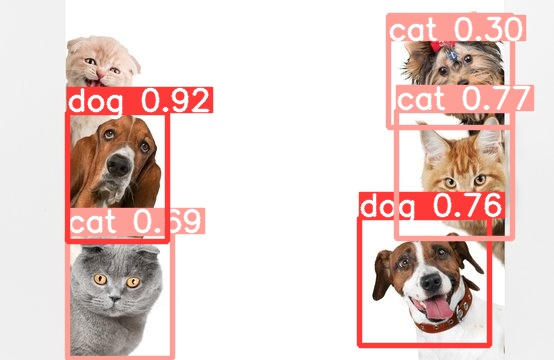

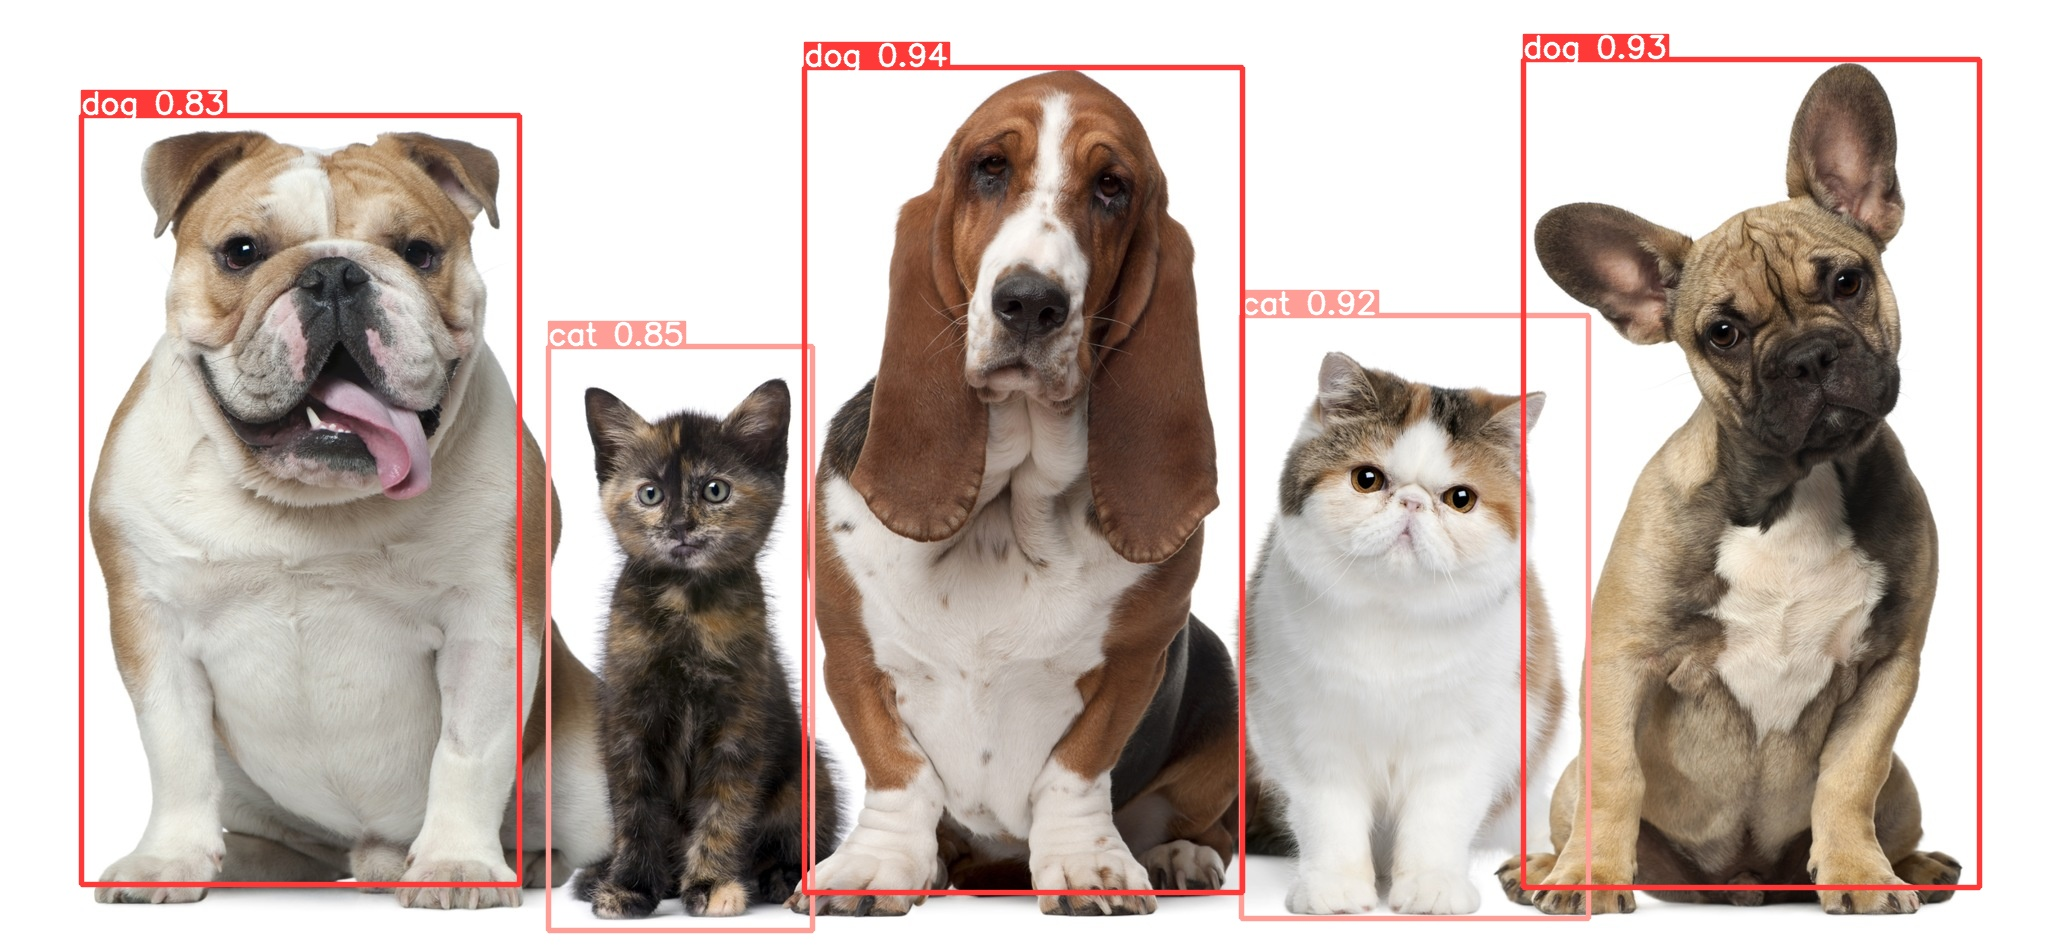

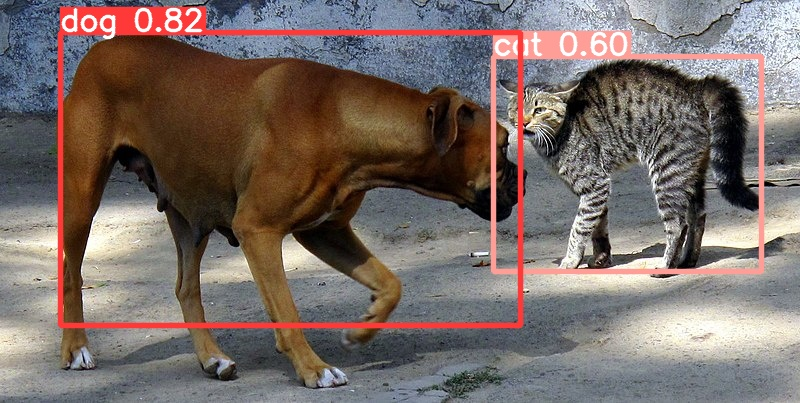

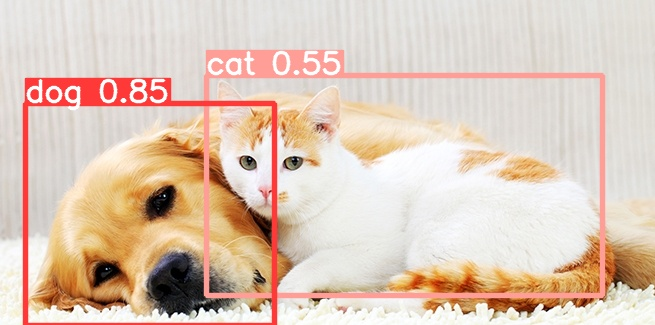

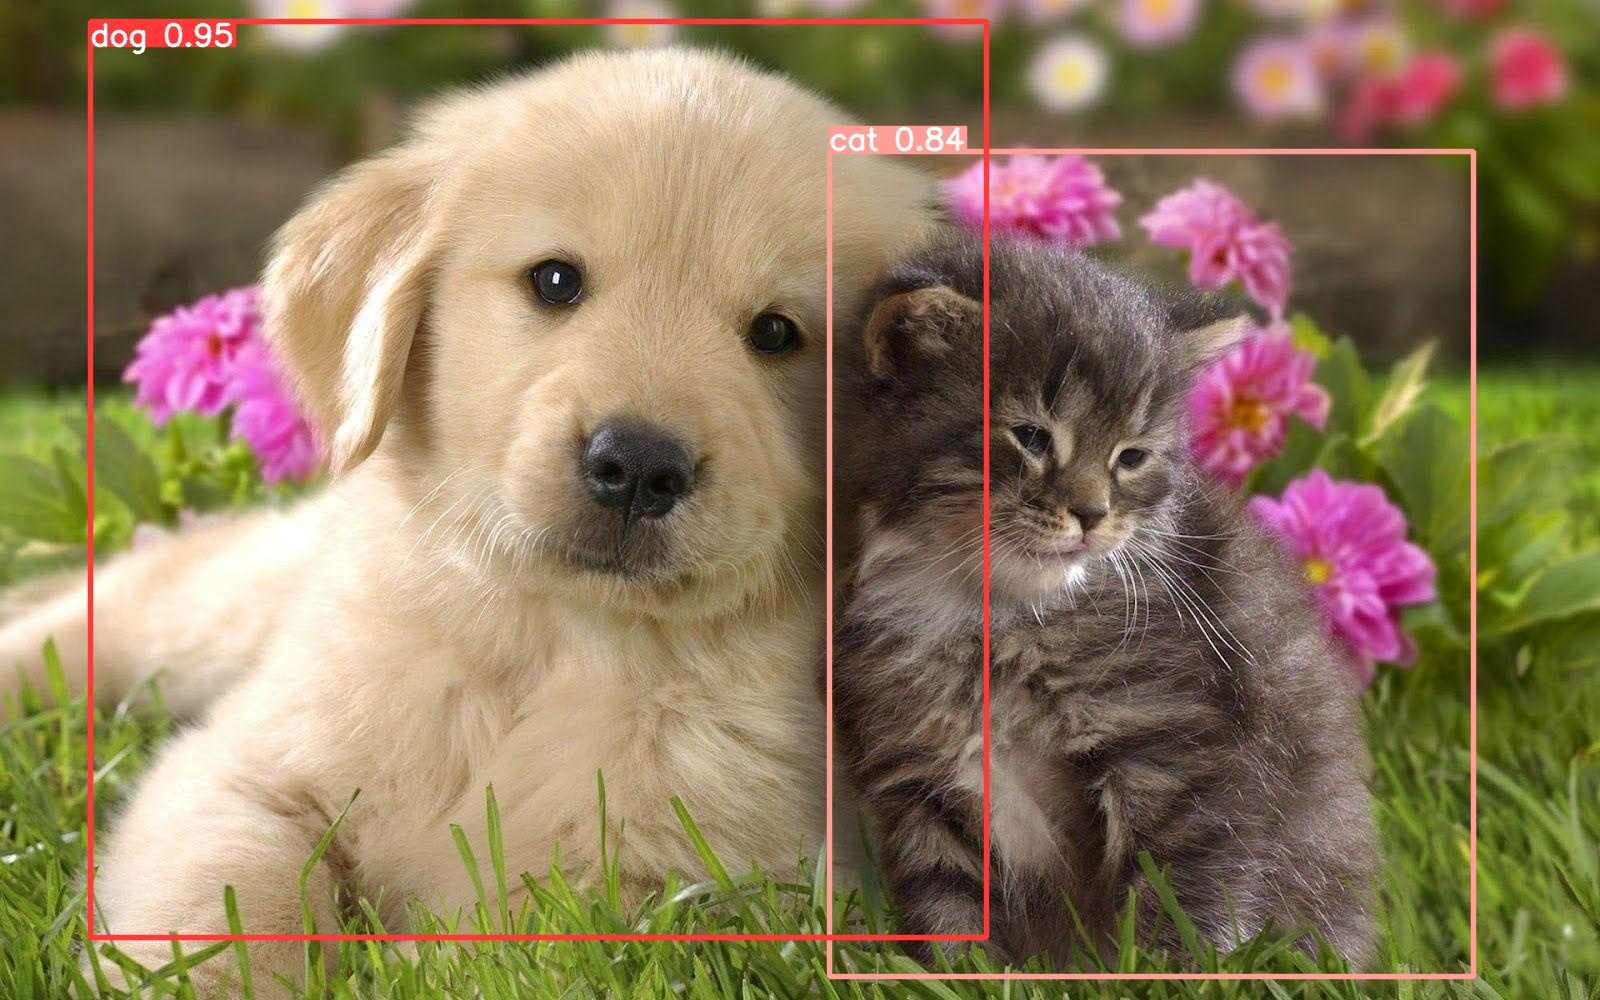

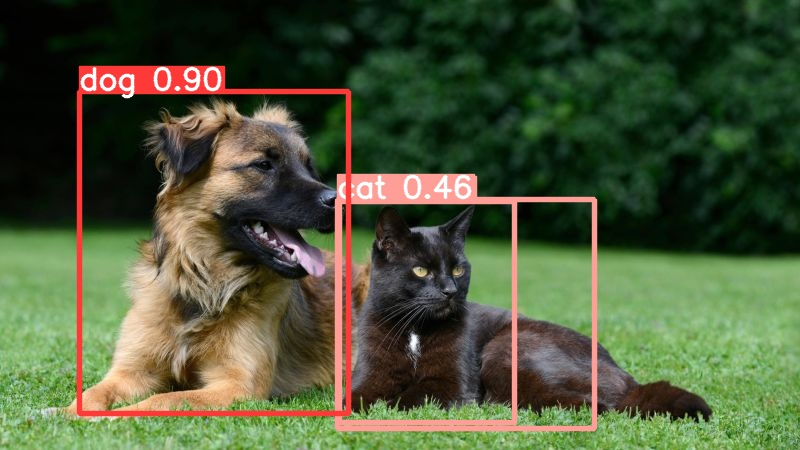

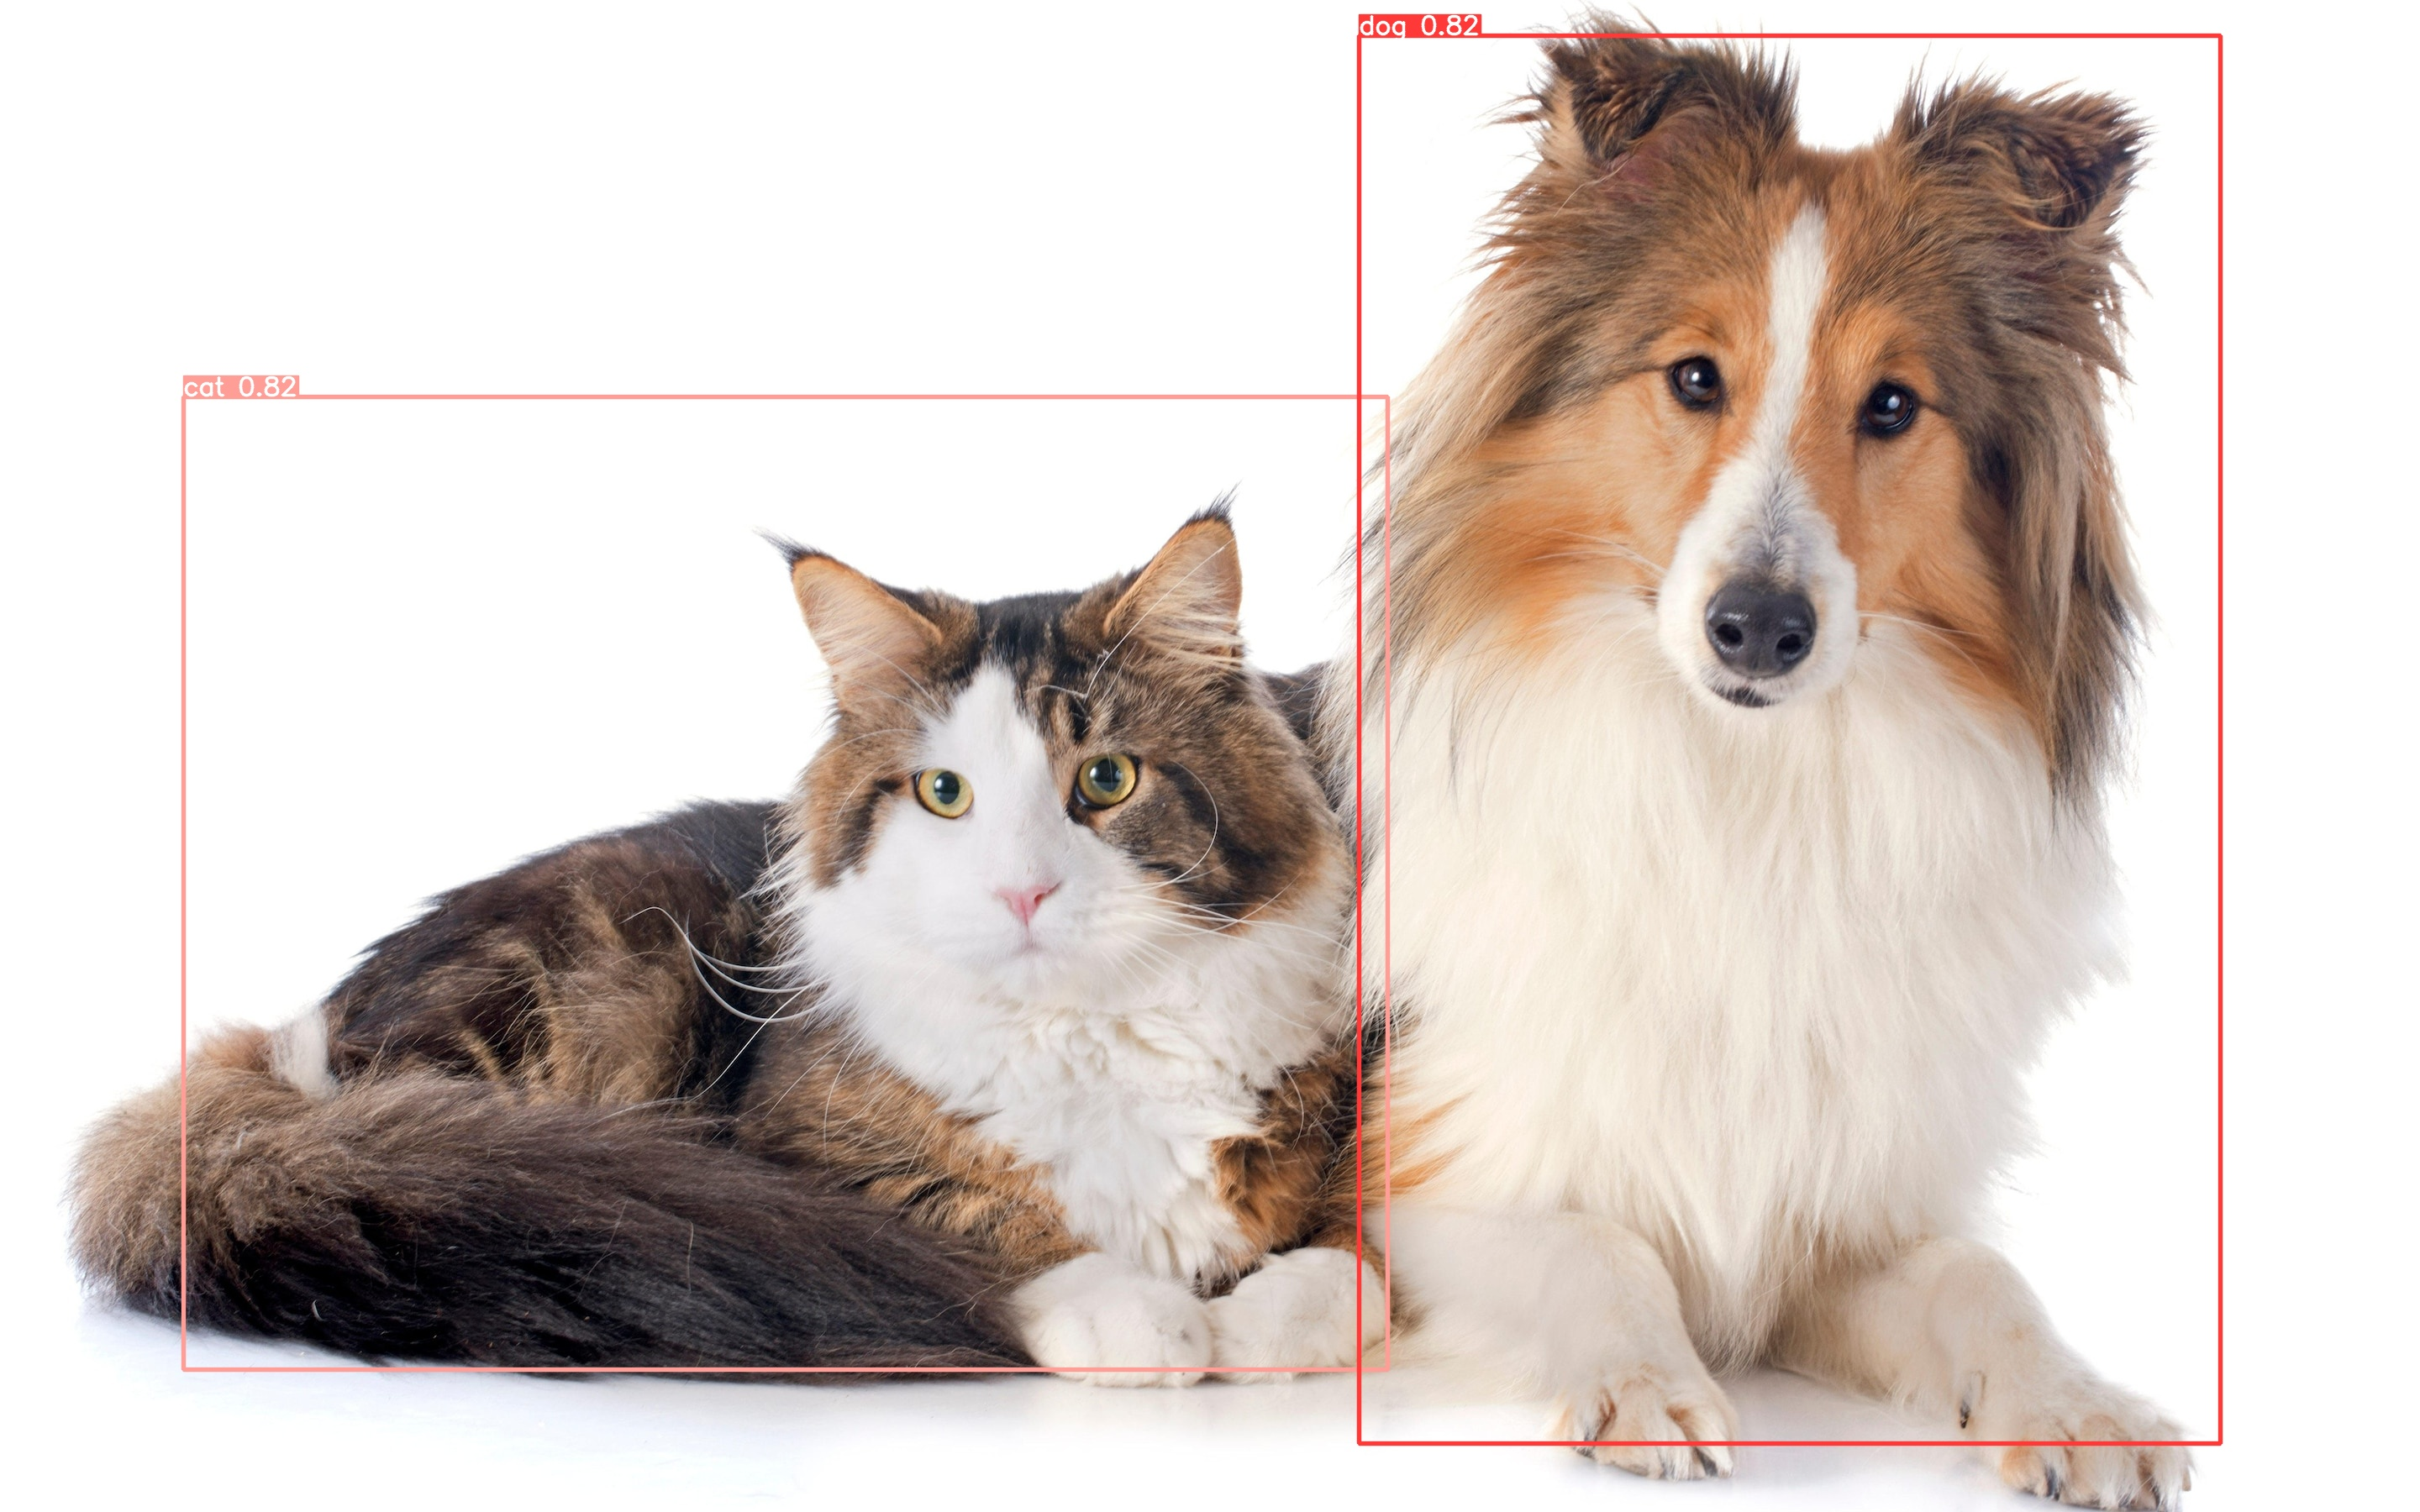

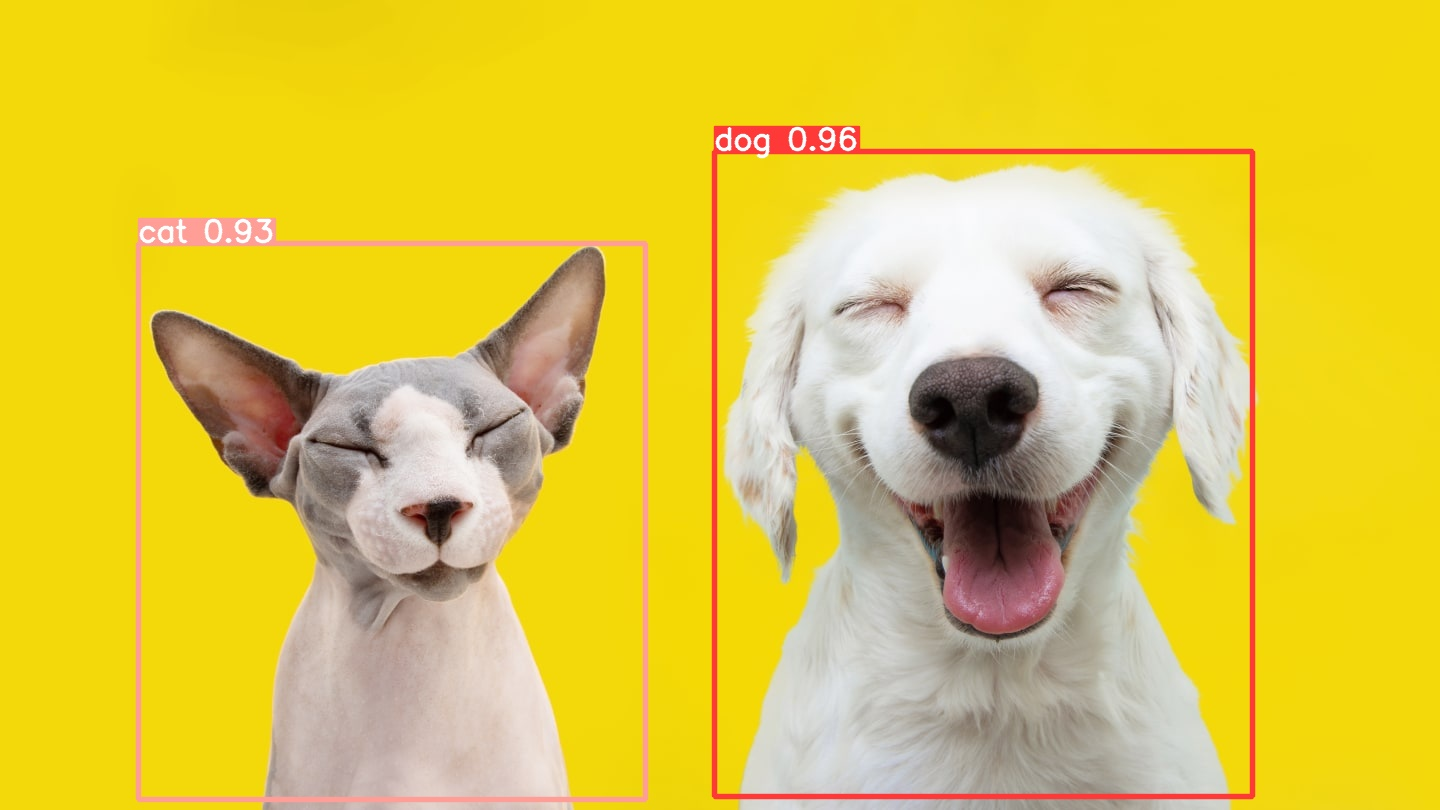

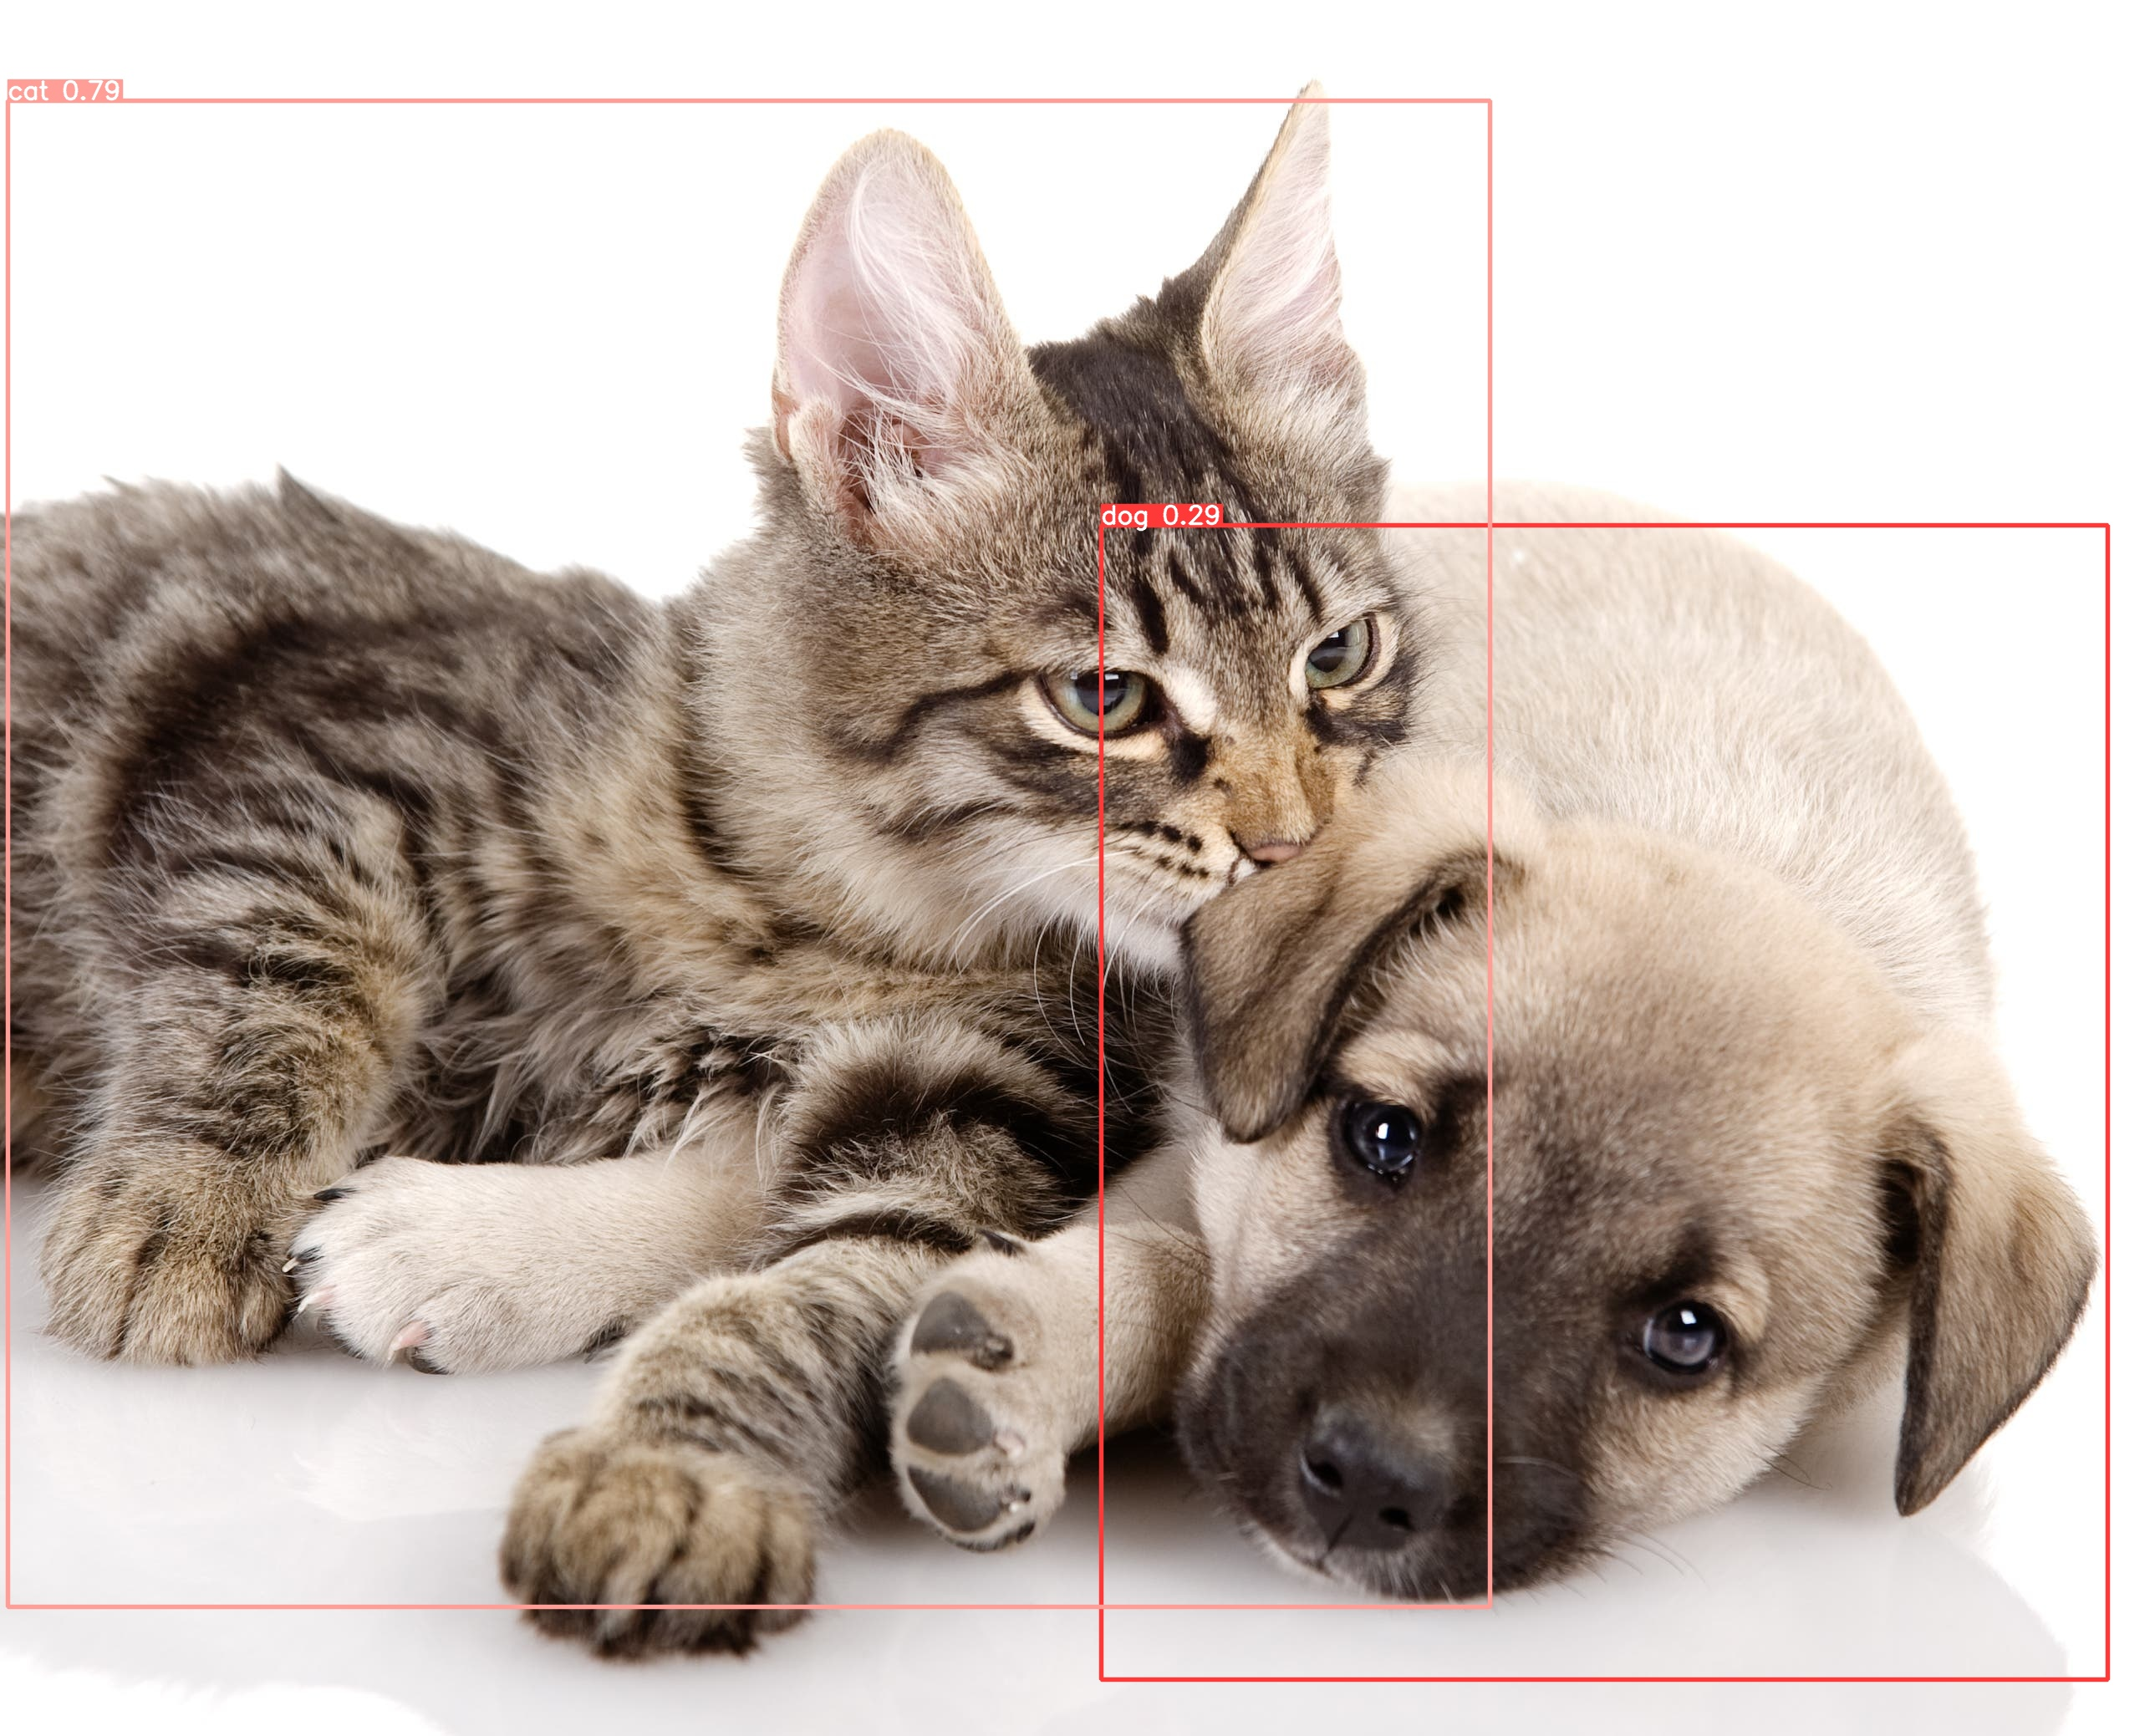

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict3/*.jpg')[1:10]:
      display(Image(filename=image_path, width=400))
      print("\n")

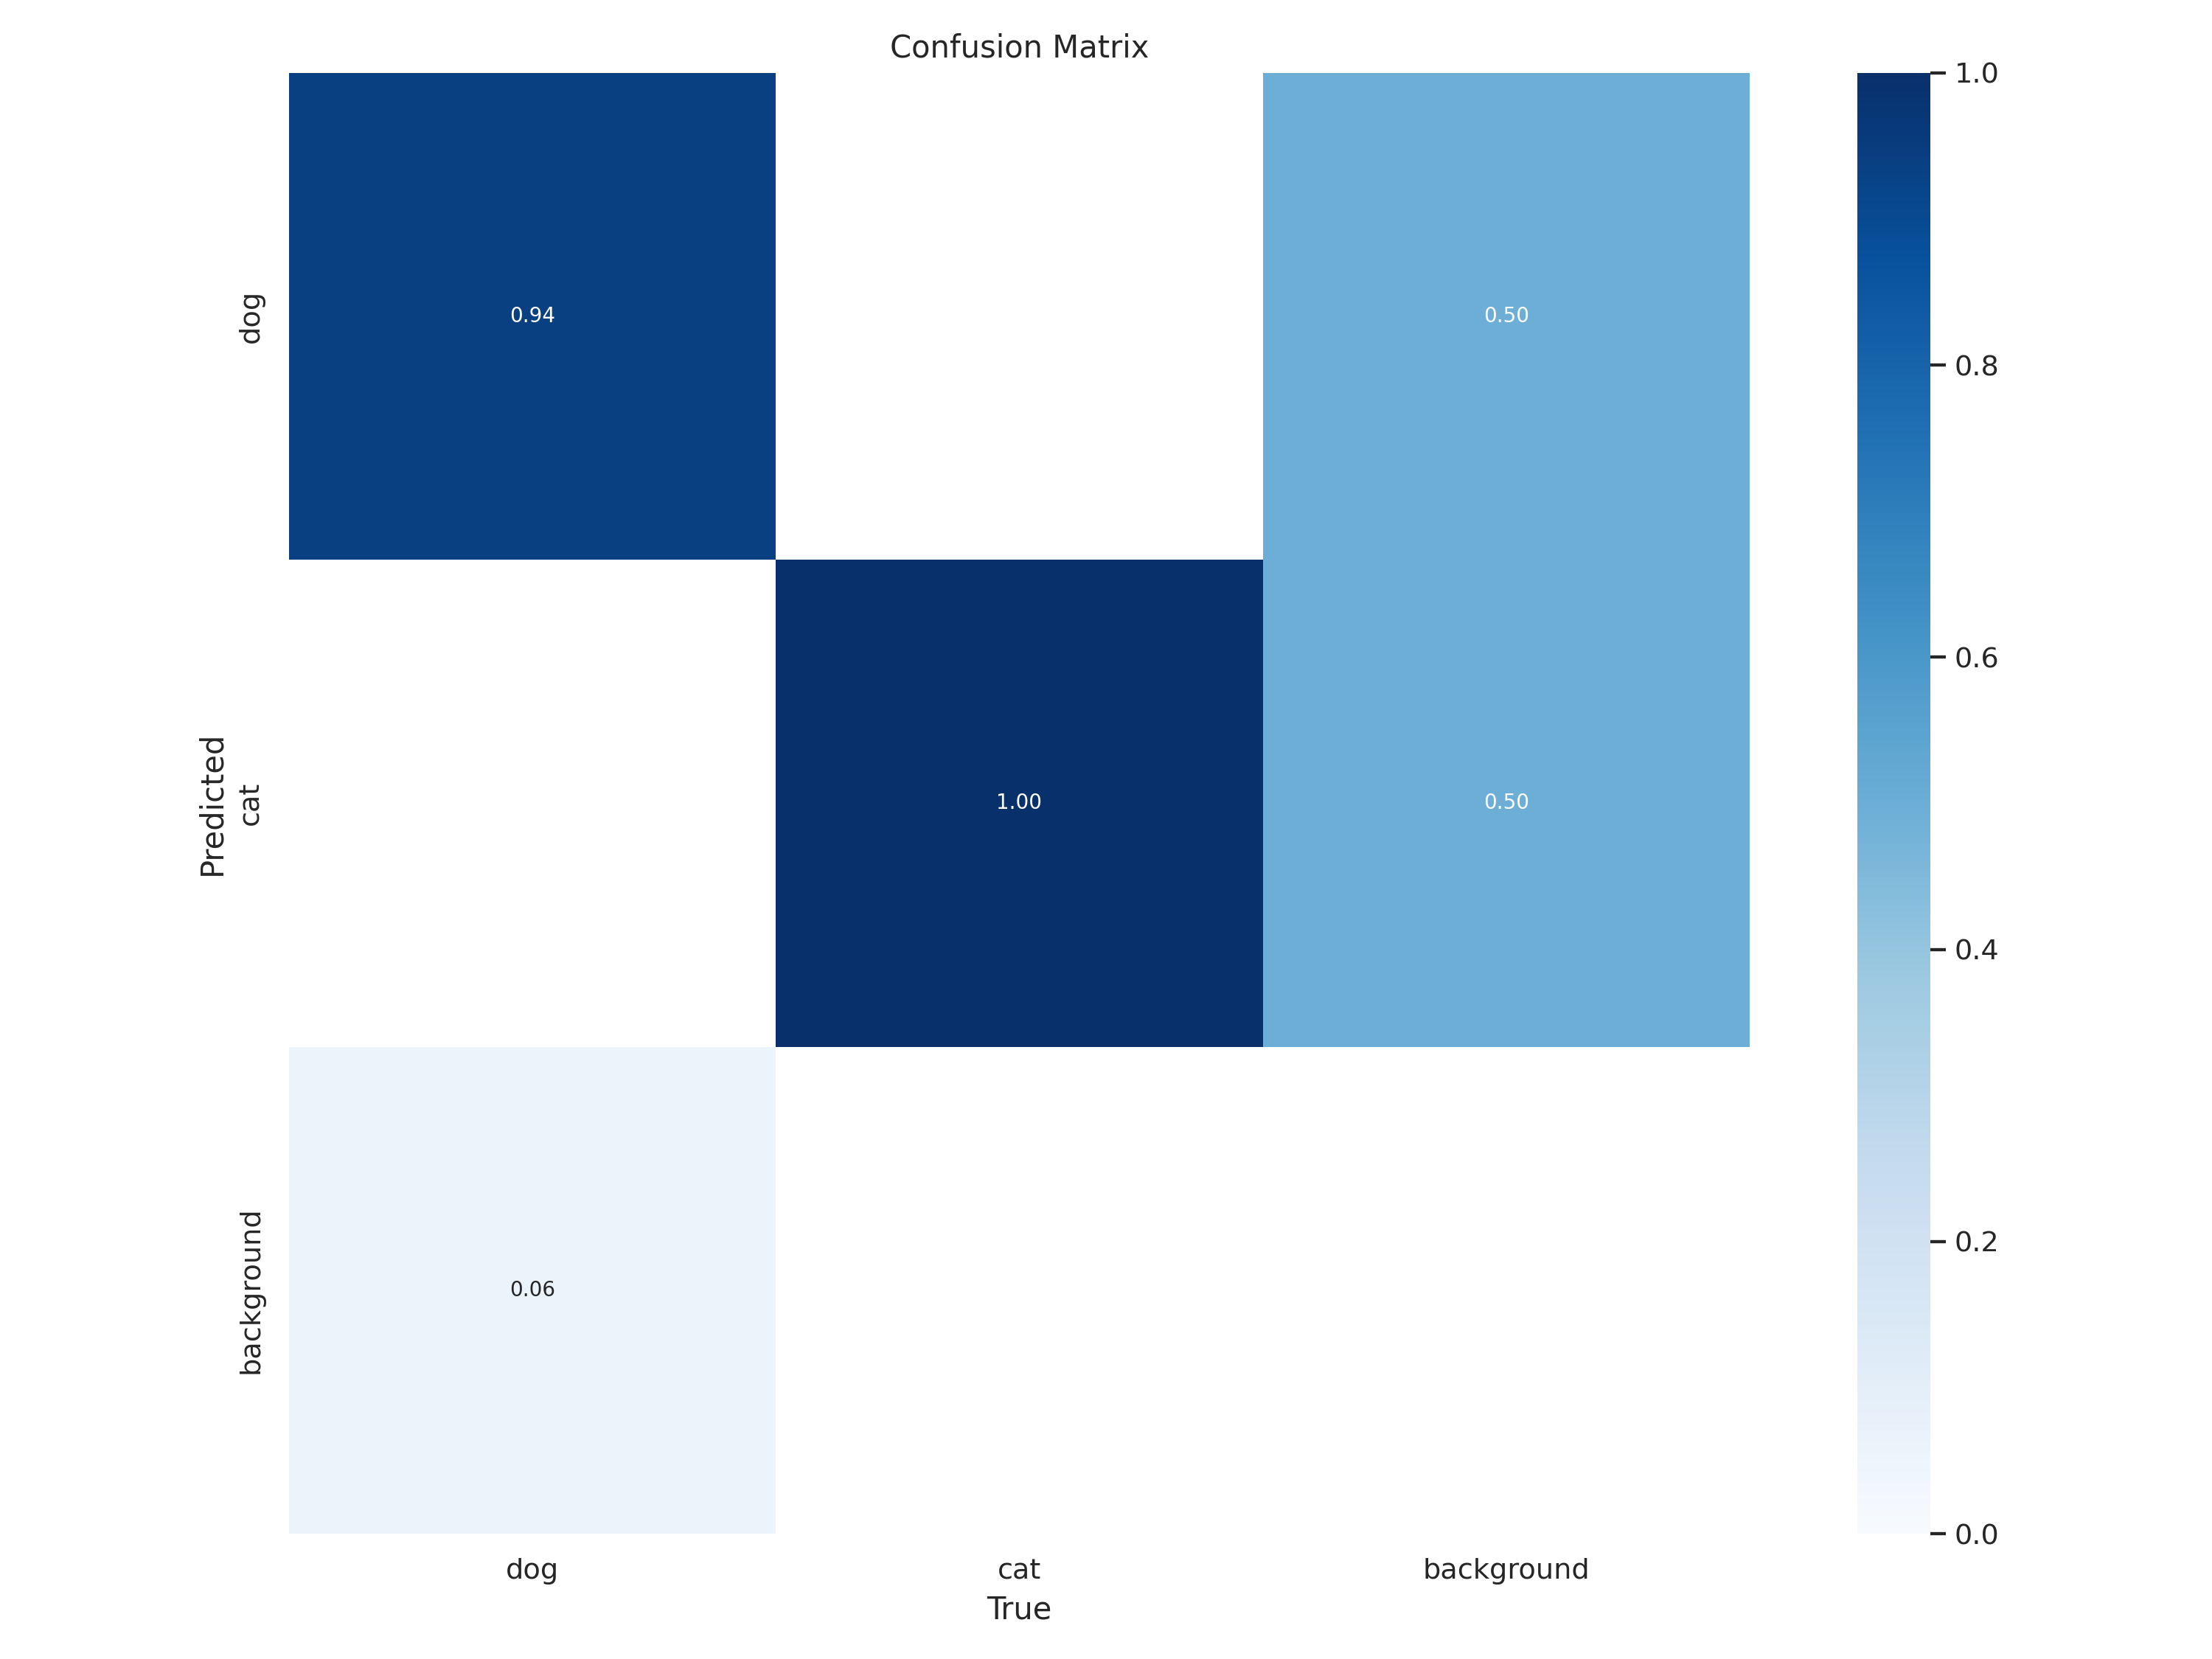

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8/runs/detect/train10/confusion_matrix.png', width=700)

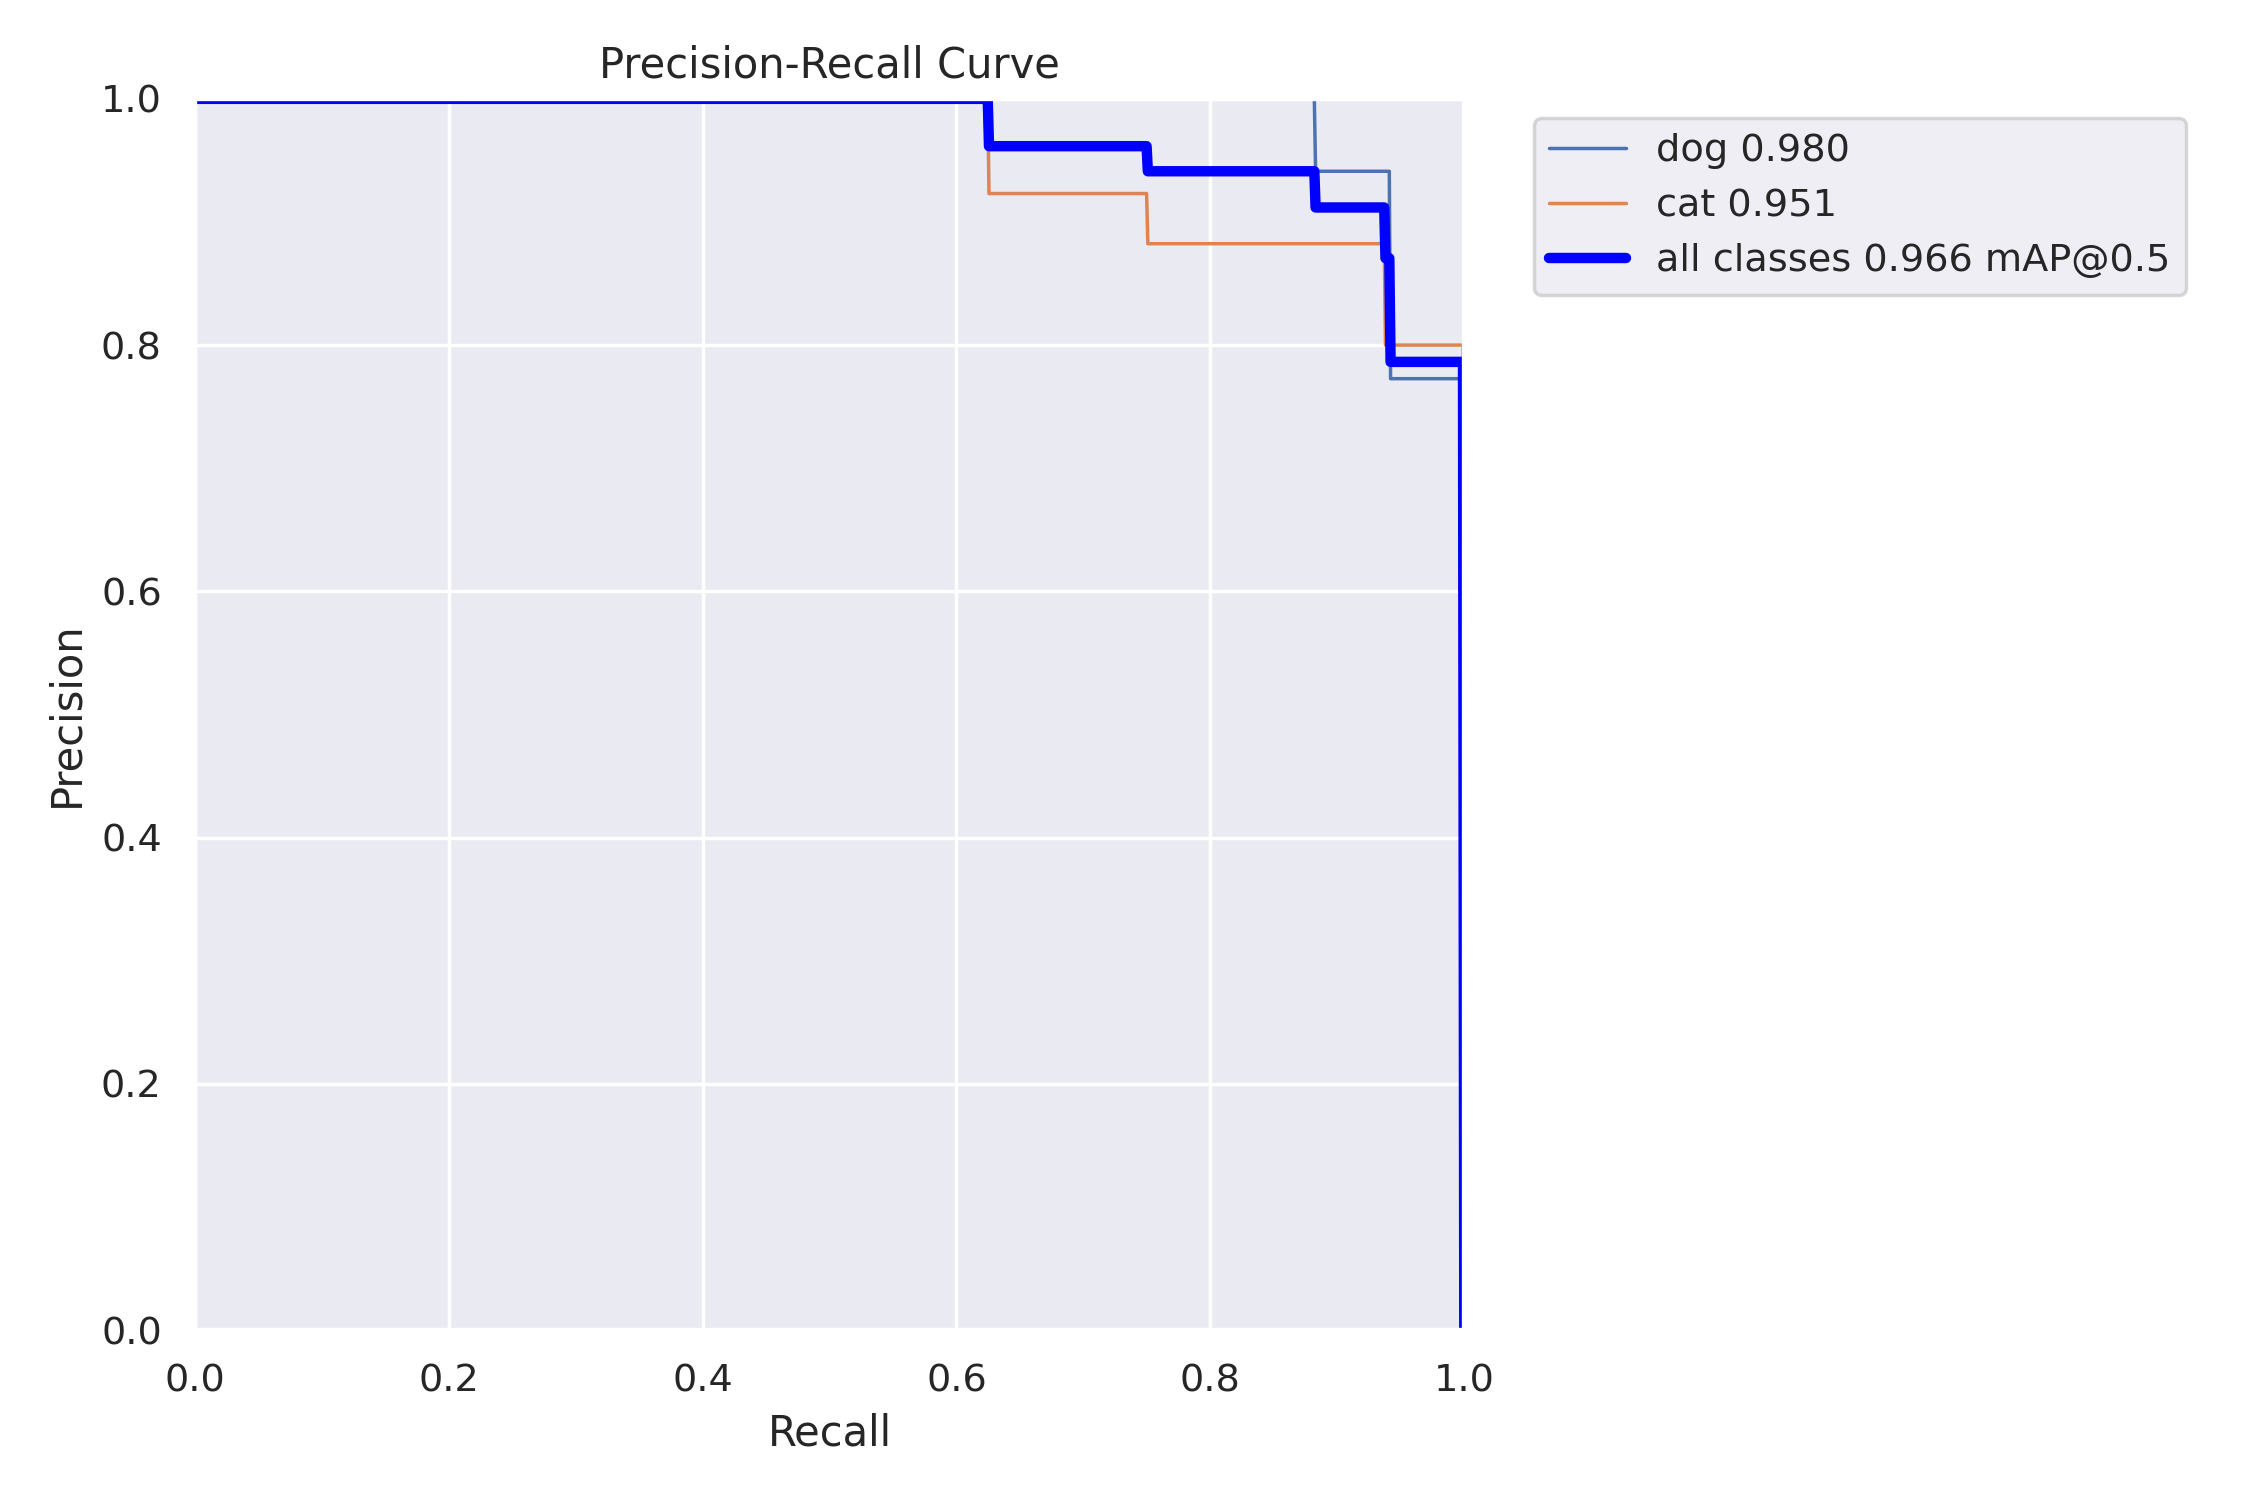

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8/runs/detect/train10/PR_curve.png', width=700)